In [54]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy import stats

# 3.1

In [55]:
digits = load_digits()

In [56]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [57]:
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

In [58]:
images.shape

(1797, 8, 8)

In [59]:
img = images[13] #3 = i%10

In [60]:
def show1(img):
    assert 2 == len(img.shape)
    plt.figure()
    plt.gray()
    plt.imshow (img , interpolation = "nearest") # also try interpolation =" bicubic "
    plt.show ()


In [61]:
def show2(imag):  
    assert 2 == len(img.shape)
    plt.figure()
    plt.gray()
    plt.imshow (img , interpolation = "bicubic") # also try interpolation =" bicubic "
    plt.show ()
    

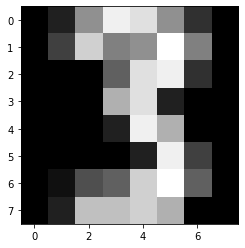

In [62]:
show1(img)

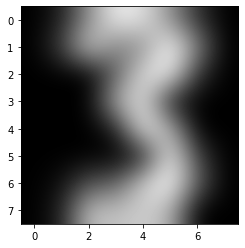

In [63]:
show2(img)

In [64]:
from sklearn import model_selection
X_all = data
#y_all = target
X_train , X_test , y_train , y_test =model_selection . train_test_split ( digits.data , digits.target , test_size = 0.4 , random_state = 0)

### 3.2

In [65]:
def dist_loop2(training, test):
    distance_matrix = np.zeros((len(training), len(test)))
    for i in range(len(training)):
        train_data = training[i]
        for k in range(len(test)):
            test_data = test[k]
            diff = np.abs(train_data - test_data)
            diff_square = np.square(diff)
            distance  = np.sqrt(np.sum(diff_square))
            distance_matrix[i][k] = distance
    return distance_matrix        

In [67]:
def dist_loop(training, test):
    distance_matrix = np.zeros((len(training), len(test)))
    for i in range(len(training)):
        train_data = training[i]
        for k in range(len(test)):
            test_data = test[k]
            diff = np.abs(train_data - test_data)
            distance  = LA.norm(diff)  #A little bit quicker
            distance_matrix[i][k] = distance
    return distance_matrix 
            

In [68]:
%timeit dist_loop(X_train, X_test)


5.06 s ± 188 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 3.3 

In [69]:
def dist_vec2(training, test):
    distance_matrix = np.zeros((len(training), len(test)))
    for i in range(len(training)):
        train_data = training[i]
        x= np.abs(train_data-test) #Esta bien pero forma diferente
        y = np.square(x[:]) #Probablemente tambien bien
        z= np.sum(y,axis=1) #correcto
        distance_matrix[i][:]  = np.sqrt(z)
    return distance_matrix 

In [70]:
def dist_vec(training, test):
    distance = np.sqrt(np.sum(np.square(np.subtract(training[:, np.newaxis], test)), axis=2))
    return distance

In [72]:
%timeit dist_vec(X_train, X_test)

346 ms ± 4.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [172]:
 dist_vec(X_train, X_test).shape

(1078, 719)

### 3.4

In [156]:
X_train2= []
X_test2= []
y_train2= []
y_test2= []
for i in range(len(X_train)):
    if y_train[i] ==3 or y_train[i] == 9:
        X_train2.append(X_train[i])
        y_train2.append(y_train[i])
for i in range(len(X_test)):
    if y_test[i] ==3 or y_test[i] == 9:
        X_test2.append(X_test[i])
        y_test2.append(y_test[i])
X_train2 = np.array(X_train2)
X_test2 = np.array(X_test2)
y_train2 = np.array(y_train2)
y_test2 = np.array(y_test2)

In [157]:
def nn_classifier(training,test,number_of_neighbors, y_train):
    diff = dist_vec(training,test)
    index_knn = np.argpartition(diff, kth=number_of_neighbors, axis=0)
    index_knn = index_knn.T
    x = index_knn[:, :number_of_neighbors]
    k_nearest_neighbors = y_train[x]
    mode,count = stats.mode(k_nearest_neighbors, axis = 1)
    label = np.reshape(mode, (1,len(mode)))
    return label[0,:]

<ErrorbarContainer object of 3 artists>

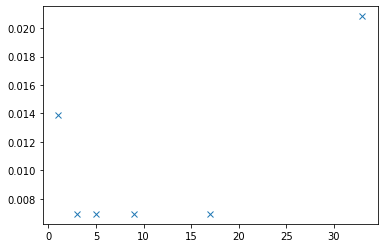

In [158]:
errors = []
k_array = (1,3,5,9,17,33)
for k in k_array:
    label = nn_classifier(X_train2, X_test2,k, y_train2)
    n_errors = 0
    for i in range(len(X_test2)):
        if label[i] != y_test2[i]: n_errors += 1
    errors.append(n_errors/len(X_test2))
plt.errorbar(k_array, errors, fmt='x')

<ErrorbarContainer object of 3 artists>

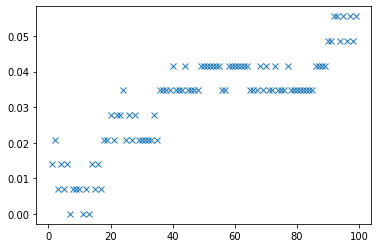

In [159]:

errors = []
k_array = np.arange(1,100,1)
for k in k_array:
    label = nn_classifier(X_train2, X_test2,k, y_train2)
    n_errors = 0
    for i in range(len(X_test2)):
        if label[i] != y_test2[i]: n_errors += 1
    errors.append(n_errors/len(X_test2))
plt.errorbar(k_array, errors, fmt='x')
